# **Chapter 3**

In [2]:
import cv2
import numpy as np
from scipy import ndimage
from google.colab.patches import cv2_imshow

**Applying an HPF to an image:**

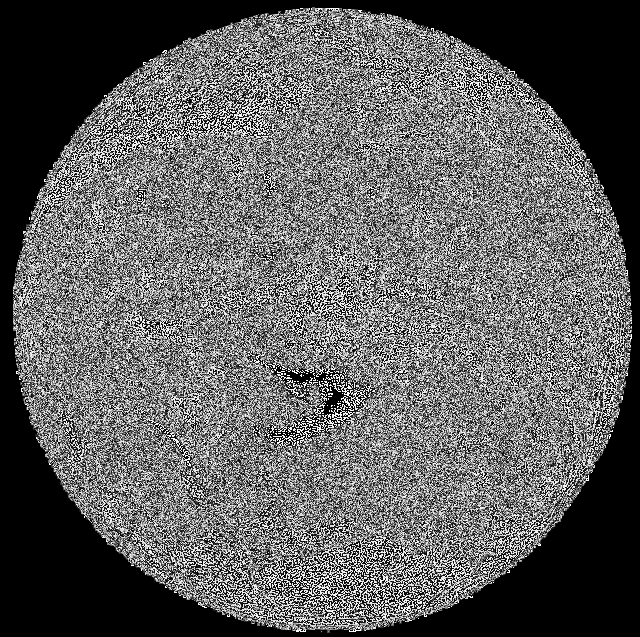

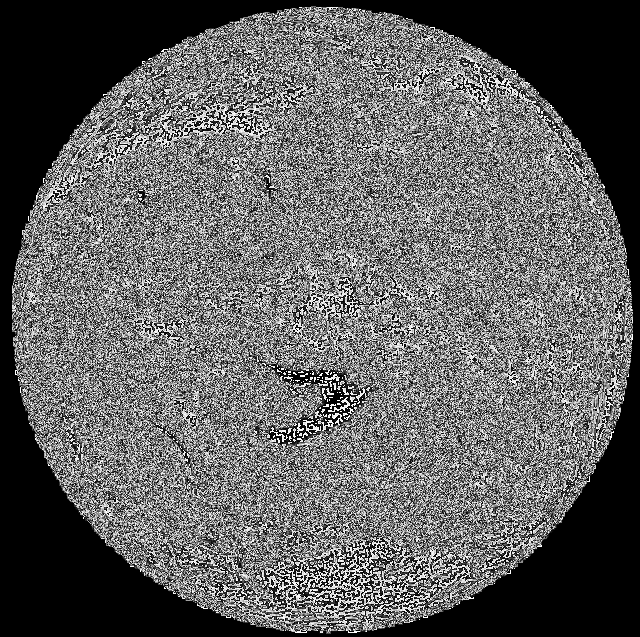

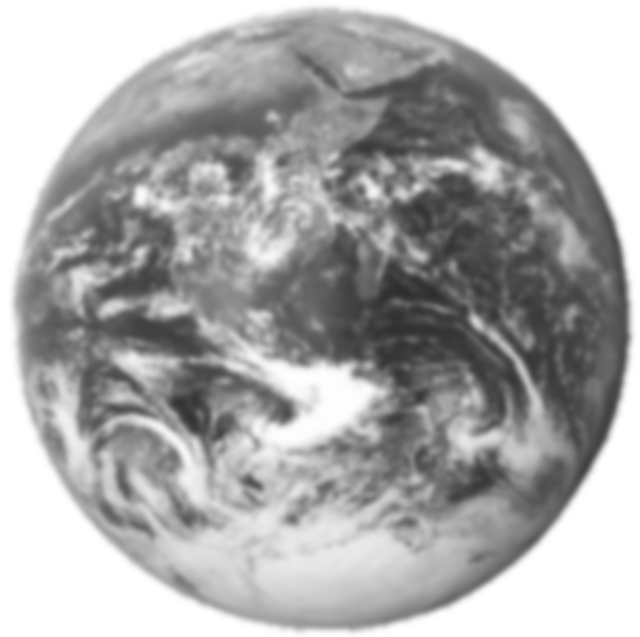

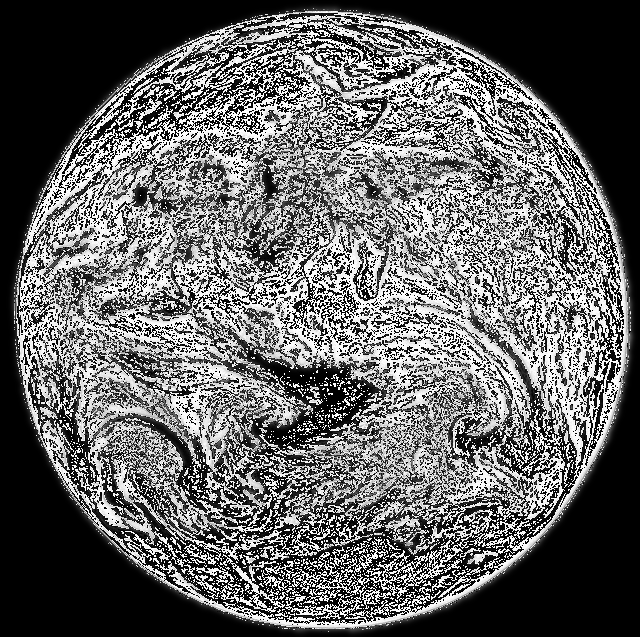

In [17]:
kernel_3x3 = np.array([[-1, -1, -1],[-1, 8, -1],[-1, -1, -1]])
kernel_5x5 = np.array([[-1, -1, -1, -1, -1],[-1, 1, 2, 1, -1],[-1, 2, 4, 2, -1],[-1, 1, 2, 1, -1],[-1, -1, -1, -1, -1]])
img = cv2.imread("earth.png", 0)
k3 = ndimage.convolve(img, kernel_3x3)
k5 = ndimage.convolve(img, kernel_5x5)
blurred = cv2.GaussianBlur(img, (17,17), 0)
g_hpf = img - blurred
# cv2.imshow("3x3", k3)
# cv2.imshow("5x5", k5)
# cv2.imshow("blurred", blurred)
# cv2.imshow("g_hpf", g_hpf)
# cv2.waitKey()
# cv2.destroyAllWindows()

cv2_imshow(k3)
cv2_imshow(k5)
cv2_imshow(blurred)
cv2_imshow(g_hpf)

**Edge Detection with Canny**

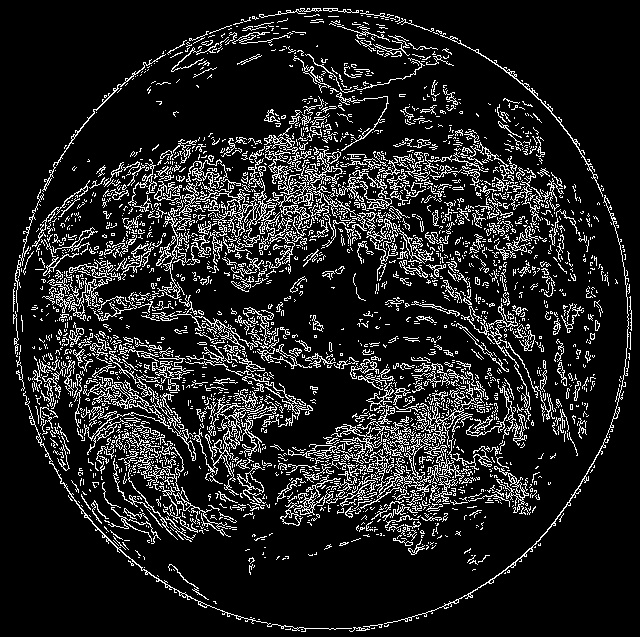

In [3]:
img = cv2.imread("earth.png", 0)
cv2.imwrite("edgeCanny.jpg", cv2.Canny(img,200,300))
# cv2.imshow("edgeCanny",cv2.imread("edgeCanny.jpg"))
# cv2.waitKey()
# cv2.destroyAllWindows()
cv2_imshow(cv2.imread("edgeCanny.jpg"))

**Contour Detection**

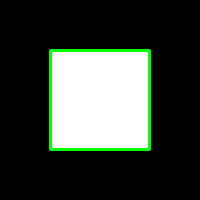

In [6]:
img = np.zeros((200,200),dtype=np.uint8)
img[50:150, 50:150] = 255

ret,thresh = cv2.threshold(img, 127,255,0)
contours,hierarchy = cv2.findContours(thresh, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

  # Use the objects appear on a plain background and we don't care about finding objects within objects.
# contours,hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

color = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
img = cv2.drawContours(color, contours,-1, (0,255,0),2)
# cv2.imshow("contours",color)
# cv2.waitKey()
# cv2.destroyAllWindows()

cv2_imshow(color)

In [ ]:
# It reads an image from a file, converts it into grayscale, applies a threshold to
# the grayscale image, and finds the contours in the thresholded image

img = cv2.pyrDown(cv2.imread("edge.png", cv2.IMREAD_UNCHANGED))
ret, thresh = cv2.threshold(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), 127, 255, cv2.THRESH_BINARY)
contours, hier = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for c in contours:
  # find bounding box coordinates
  x,y,w,h = cv2.boundingRect(c)
  cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 2)
  # find minimum area
  rect = cv2.minAreaRect(c)
  # calculate coordinates of the minimum area rectangle
  box = cv2.boxPoints(rect)
  # normalize coordinates to integers
  box = np.int0(box)
  # draw contours
  cv2.drawContours(img, [box], 0, (0,0, 255), 3)
  # calculate center and radius of minimum enclosing circle
  (x, y), radius = cv2.minEnclosingCircle(c)
  # cast to integers
  center = (int(x), int(y))
  radius = int(radius)
  # draw the circle
  img = cv2.circle(img, center, radius, (0, 255, 0), 2)


  cv2.drawContours(img, contours, -1, (255, 0, 0), 1)
  cv2_imshow(img)

**Convex contours and the Douglas-Peucker algorithm**

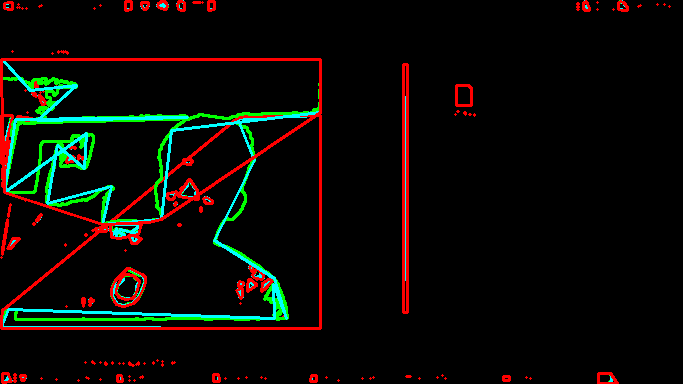

In [10]:
img = cv2.pyrDown(cv2.imread("edge.png", cv2.IMREAD_UNCHANGED))
ret, thresh = cv2.threshold(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), 127, 255, cv2.THRESH_BINARY)
contours, hier = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
black = np.zeros_like(img)
for cnt in contours:
  epsilon = 0.01 * cv2.arcLength(cnt,True)
  approx = cv2.approxPolyDP(cnt,epsilon,True)
  hull = cv2.convexHull(cnt)
  cv2.drawContours(black, [cnt], -1, (0, 255, 0), 2)
  cv2.drawContours(black, [approx], -1, (255, 255, 0), 2)
  cv2.drawContours(black, [hull], -1, (0, 0, 255), 2)
# cv2.imshow("hull", black)
# cv2.waitKey()
# cv2.destroyAllWindows()

cv2_imshow(black)

**Detecting lines**

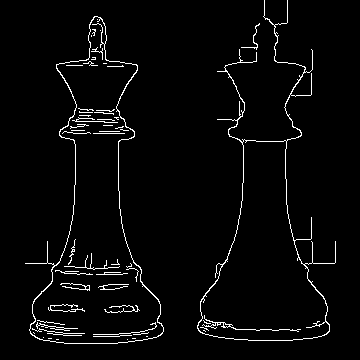

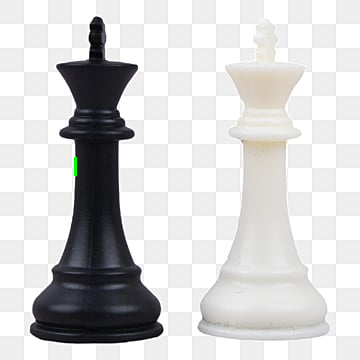

In [13]:
img = cv2.imread('chess.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 120)
minLineLength = 20
maxLineGap = 5
lines = cv2.HoughLinesP(edges, 1, np.pi/180.0, 20,
minLineLength, maxLineGap)
for x1, y1, x2, y2 in lines[0]:
  cv2.line(img, (x1, y1), (x2, y2), (0,255,0),2)
# cv2.imshow("edges", edges)
# cv2.imshow("lines", img)
# cv2.waitKey()
# cv2.destroyAllWindows()

cv2_imshow(edges)
cv2_imshow(img)

**Detecting circles**

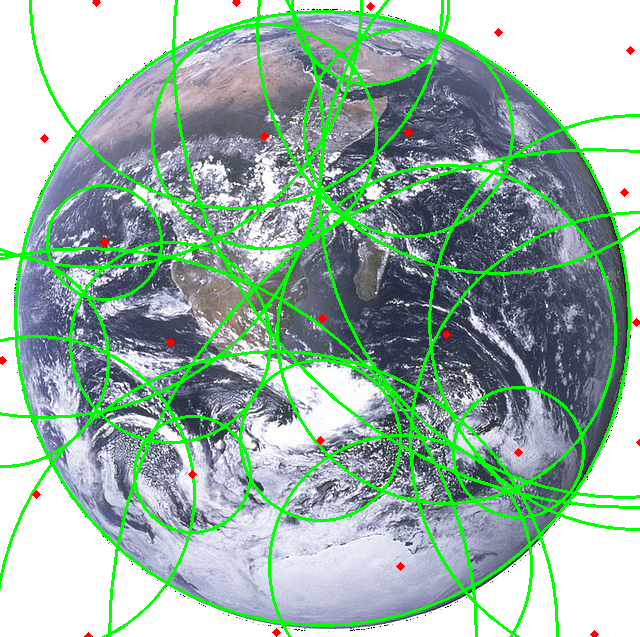

In [16]:
img = cv2.imread('earth.png')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_img = cv2.medianBlur(gray_img, 5)
circles = cv2.HoughCircles(gray_img,cv2.HOUGH_GRADIENT,1,120,
param1=100,param2=30,minRadius=0,maxRadius=0)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
  # draw the outer circle
  cv2.circle(img,(i[0],i[1]),i[2],(0,255,0),2)
  # draw the center of the circle
  cv2.circle(img,(i[0],i[1]),2,(0,0,255),3)
cv2.imwrite("img_circles.jpg", img)
cv2_imshow(img)
# cv2.imshow("HoughCirlces", planets)
# cv2.waitKey()
# cv2.destroyAllWindows()